# **TV Spots:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

A corporation is developing its marketing plans for next year's new products. For three of these products, it is considering purchasing a total of five TV spots for commercials on national television networks. The problem we will focus on is how to allocate the five spots to these three products, with a maximum of three spots (and a minimum of zero) for each product.

Table 12.3 shows the estimated impact of allocating zero, one, two, or three spots to each product. This impact is measured in terms of the profit (in units of millions of dollars) from the additional sales that would result from the spots, considering also the cost of producing the commercial and purchasing the spots. The objective is to allocate five spots to the products so as to maximize the total profit.

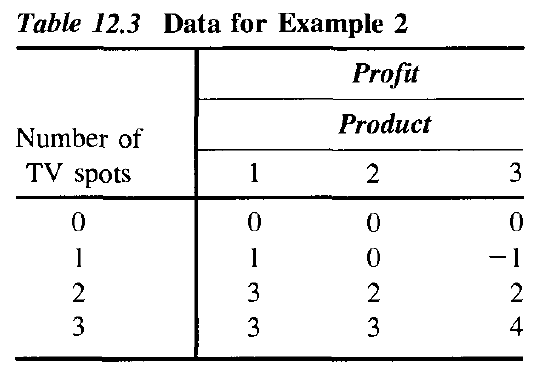

**Modeling:**

$x_{1},x_{2},x_{3} \ $   integer variables for products

$y_{ij}$   binary variables (i for products j for spots)

if $x_{i}=j \ \ \  y_{ij}=1$

$\\ $

$Objective\ Function:\\ $

$Max\ Z = y_{11}+3y_{12}+3y_{13}+2y_{22}+3y_{23}-y_{31}+2y_{32}+4y_{33}$

$\\ $

$Constraints:\\ $

$y_{11}+y_{12}+y_{13} \leq 1$

$y_{21}+y_{22}+y_{23} \leq 1$

$y_{31}+y_{32}+y_{33} \leq 1$

$y_{11}+2y_{12}+3y_{13}+y_{21}+2y_{22}+3y_{23}+y_{31}+2y_{32}+3y_{33} = 5$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in [1,2,3]), lowBound=0, cat='Integer')
y = LpVariable.dicts('y', ((i,j) for i in [1,2,3] for j in [1,2,3]), cat='Binary')

In [3]:
#Defining Objective Function

model = LpProblem('model', LpMaximize)

model += y[1,1]+3*y[1,2]+3*y[1,3]+2*y[2,2]+3*y[2,3]-y[3,1]+2*y[3,2]+4*y[3,3]

In [4]:
#Constraints

model += y[1,1]+y[1,2]+y[1,3] <= 1
model += y[2,1]+y[2,2]+y[2,3] <= 1
model += y[3,1]+y[3,2]+y[3,3] <= 1
model += y[1,1]+2*y[1,2]+3*y[1,3]+y[2,1]+2*y[2,2]+3*y[2,3]+y[3,1]+2*y[3,2]+3*y[3,3] == 5
model += x[1] == y[1,1]+2*y[1,2]+3*y[1,3]
model += x[2] == y[2,1]+2*y[2,2]+3*y[2,3]
model += x[3] == y[3,1]+2*y[3,2]+3*y[3,3]

In [5]:
#Model summary

model

model:
MAXIMIZE
1*y_(1,_1) + 3*y_(1,_2) + 3*y_(1,_3) + 2*y_(2,_2) + 3*y_(2,_3) + -1*y_(3,_1) + 2*y_(3,_2) + 4*y_(3,_3) + 0
SUBJECT TO
_C1: y_(1,_1) + y_(1,_2) + y_(1,_3) <= 1

_C2: y_(2,_1) + y_(2,_2) + y_(2,_3) <= 1

_C3: y_(3,_1) + y_(3,_2) + y_(3,_3) <= 1

_C4: y_(1,_1) + 2 y_(1,_2) + 3 y_(1,_3) + y_(2,_1) + 2 y_(2,_2) + 3 y_(2,_3)
 + y_(3,_1) + 2 y_(3,_2) + 3 y_(3,_3) = 5

_C5: x_1 - y_(1,_1) - 2 y_(1,_2) - 3 y_(1,_3) = 0

_C6: x_2 - y_(2,_1) - 2 y_(2,_2) - 3 y_(2,_3) = 0

_C7: x_3 - y_(3,_1) - 2 y_(3,_2) - 3 y_(3,_3) = 0

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= y_(1,_1) <= 1 Integer
0 <= y_(1,_2) <= 1 Integer
0 <= y_(1,_3) <= 1 Integer
0 <= y_(2,_1) <= 1 Integer
0 <= y_(2,_2) <= 1 Integer
0 <= y_(2,_3) <= 1 Integer
0 <= y_(3,_1) <= 1 Integer
0 <= y_(3,_2) <= 1 Integer
0 <= y_(3,_3) <= 1 Integer

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 7.0


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:2.0
x_2:0.0
x_3:3.0
y_(1,_1):0.0
y_(1,_2):1.0
y_(1,_3):0.0
y_(2,_1):0.0
y_(2,_2):0.0
y_(2,_3):0.0
y_(3,_1):0.0
y_(3,_2):0.0
y_(3,_3):1.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,2.0
2,x_2,0.0
3,x_3,3.0
4,"y_(1,_1)",0.0
5,"y_(1,_2)",1.0
6,"y_(1,_3)",0.0
7,"y_(2,_1)",0.0
8,"y_(2,_2)",0.0
9,"y_(2,_3)",0.0
10,"y_(3,_1)",0.0


## Using Pyomo Library

In [9]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [10]:
model = ConcreteModel()

model.indicesx = Set(initialize=[1,2,3])
model.indicesy = Set(initialize=[1,2,3])
model.x = Var(model.indicesx, domain=Integers)
model.y = Var(model.indicesx, model.indicesy, domain=Binary)

model.obj = Objective(expr=model.y[1,1]+3*model.y[1,2]+3*model.y[1,3]+2*model.y[2,2]+3*model.y[2,3]-model.y[3,1]+2*model.y[3,2]+4*model.y[3,3], sense=maximize)

model.constraint1 = Constraint(expr=model.y[1,1]+model.y[1,2]+model.y[1,3] <= 1)
model.constraint2 = Constraint(expr=model.y[2,1]+model.y[2,2]+model.y[2,3] <= 1)
model.constraint3 = Constraint(expr=model.y[3,1]+model.y[3,2]+model.y[3,3] <= 1)
model.constraint4 = Constraint(expr=model.y[1,1]+2*model.y[1,2]+3*model.y[1,3]+model.y[2,1]+2*model.y[2,2]+3*model.y[2,3]+model.y[3,1]+2*model.y[3,2]+3*model.y[3,3] == 5)
model.constraint5 = Constraint(expr=model.x[1] == model.y[1,1]+2*model.y[1,2]+3*model.y[1,3])
model.constraint6 = Constraint(expr=model.x[2] == model.y[2,1]+2*model.y[2,2]+3*model.y[2,3])
model.constraint7 = Constraint(expr=model.x[3] == model.y[3,1]+2*model.y[3,2]+3*model.y[3,3])

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=3, Index=indicesx
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :  None :   2.0 :  None : False : False : Integers
          2 :  None :   0.0 :  None : False : False : Integers
          3 :  None :   3.0 :  None : False : False : Integers
    y : Size=9, Index=indicesx*indicesy
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   0.0 :     1 : False : False : Binary
        (1, 2) :     0 :   1.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   0.0 :     1 : False : False : Binary
        (2, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   1.0 :     1 : False : False : Binary

  Objectiv

In [11]:
print("Variable values:")
model.x.pprint()
model.y.pprint()

Variable values:
x : Size=3, Index=indicesx
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :  None :   2.0 :  None : False : False : Integers
      2 :  None :   0.0 :  None : False : False : Integers
      3 :  None :   3.0 :  None : False : False : Integers
y : Size=9, Index=indicesx*indicesy
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (1, 1) :     0 :   0.0 :     1 : False : False : Binary
    (1, 2) :     0 :   1.0 :     1 : False : False : Binary
    (1, 3) :     0 :   0.0 :     1 : False : False : Binary
    (2, 1) :     0 :   0.0 :     1 : False : False : Binary
    (2, 2) :     0 :   0.0 :     1 : False : False : Binary
    (2, 3) :     0 :   0.0 :     1 : False : False : Binary
    (3, 1) :     0 :   0.0 :     1 : False : False : Binary
    (3, 2) :     0 :   0.0 :     1 : False : False : Binary
    (3, 3) :     0 :   1.0 :     1 : False : False : Binary
